In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from config import opt
import model
from data.util import  read_image
from lib.vis_tool import vis_and_save_bbox
from lib import array_tool as at
%matplotlib inline

/home/heecheol/anaconda3/envs/tf35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/heecheol/anaconda3/envs/tf35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/heecheol/anaconda3/envs/tf35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
img = read_image('demo/demo.jpg')
img = t.from_numpy(img)[None]

In [3]:
resnet = model.resnet18(20,True)
resnet = resnet.cuda()

In [4]:
resnet = t.nn.DataParallel(resnet).cuda()

In [5]:
resnet.load_state_dict(t.load('Weights/resnet_99.pt'))

/home/heecheol/GIT/Relation_Networks-pytorch/model.py:207: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


AttributeError: 'list' object has no attribute 'get_figure'

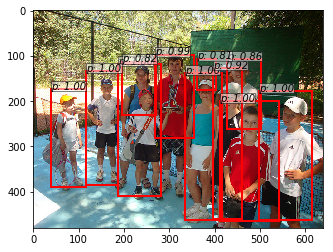

In [6]:
_bboxes, _labels, _scores = resnet.module.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))